# GA Data Science 

### ROC Curves, Imbalanced Classes

In this lab/lecture, we will learn about imbalanced classes and ROC curves, a more sophisticated measure of classifier performance than outputing just an error rate.

ROC curves work in the context of Binary classification. And they capture the tradeoff between the True Positive and False positive percentages. A perfect classifier would have 100% true positive percentage, meaning that it classified all the elements in the positive class as being positive and it made no errors in misclassifying the elements in the negative class as being positive. 

True Positive Percentage = (# True Positives) / (# All Positives)

False Positive Percentage = (# False Positives) / (# All Negatives)

Although this is possible, in reality, as you increase the true positive percentage, you also increase the false positive percentage. The ROC curve captures this relationship. 


# Logistic Regression on Titanic Dataset

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
# import data
data_orig = pd.read_csv('../../assets/dataset/titanic-train.csv')

## Demonstration of imbalanced classes

For the purposes of this example, we will make the minority class, survived, much smaller 
than the majority class. **We will make the survived class have only 100 entries** instead of the original 342. Recall that 542 passengers died in our dataset.

In [3]:
data_survived = data_orig[data_orig.Survived == 1]
#print len(data_survived)
data_passed = data_orig[data_orig.Survived == 0]
#print len(data_passed)
tmp = [data_survived[:100], data_passed]
data = pd.concat(tmp)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 649 entries, 1 to 890
Data columns (total 12 columns):
PassengerId    649 non-null int64
Survived       649 non-null int64
Pclass         649 non-null int64
Name           649 non-null object
Sex            649 non-null object
Age            505 non-null float64
SibSp          649 non-null int64
Parch          649 non-null int64
Ticket         649 non-null object
Fare           649 non-null float64
Cabin          100 non-null object
Embarked       648 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 65.9+ KB


In [4]:
#fill na, define features and target numpy arrays

In [5]:
numerical_features = data.get(['Fare', 'Pclass', 'Age'])
features_array = numerical_features.fillna(numerical_features.dropna().median()).values
target = data.Survived.values

In [6]:
# train test split
features_train, features_test, target_train, target_test = train_test_split(features_array, target, test_size=0.20, random_state=0)

#### Scikit version of logistic regression 

In [7]:
# train logistic regression, evaluate on test
lr = LogisticRegression(C=1)
lr.fit(features_train, target_train)
    
#clf = train_test(data_out)
target_predicted = lr.predict(features_test)

In [8]:
#evaluate accuracy
print("Train Testing Results \n\n")

print(classification_report(target_test, target_predicted,
                         target_names=['not survived', 'survived']))

Train Testing Results 


              precision    recall  f1-score   support

not survived       0.84      0.98      0.90       109
    survived       0.00      0.00      0.00        21

 avg / total       0.70      0.82      0.76       130



### 1. How did our predictor do in the "survived" category? How does that compared to athe "not survived"?

Answer: We see that the classifier does not do so well on the "Survived" Class ... 

### Let's downsample the majority class to train our classifer and see if we can get better performance

To do this, we will train our logistic regression classifier with downsampled data and use this trained classifier on the non-downsampled data to see if it can do a better job

In [9]:
#We are downsampling the majority class and training a new classifier. 
tmp = [data_survived[:100], data_passed[:100]]
data_ds = pd.concat(tmp)

numerical_features_ds = data_ds.get(['Fare', 'Pclass', 'Age'])
features_array_ds = numerical_features_ds.fillna(numerical_features_ds.dropna().median()).values
target_ds = data_ds.Survived.values

### 2. Train and split the data

In [10]:
#train test split
features_train_ds, features_test_ds, target_train_ds, target_test_ds = train_test_split(features_array_ds, target_ds, test_size=0.20, random_state=0)

### 3. Run a logistic regression in scikit learn

In [11]:
# train logistic regression, evaluate on test, and set target_predicted_ds as the predicted
lr_ds = LogisticRegression(C=1)
lr_ds.fit(features_train_ds, target_train_ds)
target_predicted_ds = lr_ds.predict(features_test)

#### Now we are taking this classifier trained on downsampled data and seeing if it performs better with the full dataset. Note that we are testing the classifier "lr_ds" with 'features_test'


### 4. Evaluate the accuracy

In [12]:
print("Train Testing Results With Downsampling the majority class \n\n")

print(classification_report(target_test, target_predicted_ds,
                         target_names=['not survived', 'survived']))
    

Train Testing Results With Downsampling the majority class 


              precision    recall  f1-score   support

not survived       0.86      0.72      0.78       109
    survived       0.21      0.38      0.27        21

 avg / total       0.75      0.66      0.70       130



### 5. How did our predictor do in the "survived" category? How does that compared to the "not survived"? How does this compare to the first sample? 


Answer: We see that the classifier does much better on the "Survived" class and a little worse on the "Not Survived" Class

## Instead of downsampling the majority class, let's upsample the minority class

In [13]:
tmp = [data_survived, data_survived, data_passed]
data_us = pd.concat(tmp)

numerical_features_us = data_us.get(['Fare', 'Pclass', 'Age'])
features_array_us = numerical_features_us.fillna(numerical_features_us.dropna().median()).values
target_us = data_us.Survived.values

#train test split
features_train_us, features_test_us, target_train_us, target_test_us = train_test_split(features_array_us, target_us, test_size=0.20, random_state=0)

# train logistic regression, evaluate on test
lr_us = LogisticRegression(C=1)
lr_us.fit(features_train_us, target_train_us)
target_predicted_us = lr_us.predict(features_test)

#### Now we are taking this classifier trained on downsampled data and seeing if it performs better with the full dataset. Note that we are testing the classifier "lr_us" with 'features_test'


### 6. Evaluate the accuracy

In [14]:
print("Train Testing Results With Downsampling the majority class and Upsampling the Minority Class \n\n")

print(classification_report(target_test, target_predicted_us,
                         target_names=['not survived', 'survived']))      

Train Testing Results With Downsampling the majority class and Upsampling the Minority Class 


              precision    recall  f1-score   support

not survived       0.86      0.66      0.75       109
    survived       0.20      0.43      0.27        21

 avg / total       0.75      0.62      0.67       130



### 7. How did this model do compared to the two previous models? 

Answer: better!

## Model evaluation and interpretation, ROC

Logistic Regression is a probabilistic model: instead of just predicting a binary outcome (survived or not) given the input features it can also estimate the probability of the outcome given the input features using the `predict_proba` method:

In [15]:
proba_lr_ds = lr_ds.predict_proba(features_test)

print(proba_lr_ds[:5])

[[ 0.53003519  0.46996481]
 [ 0.57799702  0.42200298]
 [ 0.56418399  0.43581601]
 [ 0.76572377  0.23427623]
 [ 0.62389213  0.37610787]]


By default, the decision threshold is 0.5: if we vary the decision threshold from 0 to 1 we could generate a family of binary classifier models that addresses all the possible trade offs between false positive and false negative prediction errors.

We can summarize the performance of a binary classifier for all the possible thresholds by plotting the ROC curve and quantifying the Area under the ROC curve:

In [16]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def plot_roc_curve(target_test, target_predicted_proba, this_label):
    fpr, tpr, thresholds = roc_curve(target_test, target_predicted_proba[:, 1])
    
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.plot(fpr, tpr, label= this_label + ', ROC Area = %0.3f' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('ROC')
    plt.legend(loc="lower right")

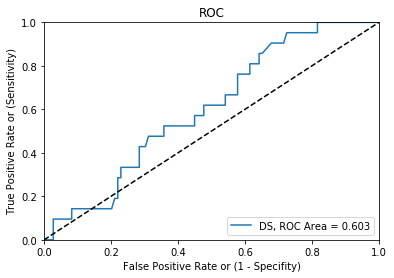

In [17]:
plot_roc_curve(target_test, proba_lr_ds, "DS")

### 8. Interpret this result

Answer: Only slightly better than chance

# Another Strategy ... Adjusting Class Weights 


In [18]:
# We'll use the datasets before we downsample or upsample ... 
#Remember that our classifier did very poorly in classifying the minority class here
features_train, features_test, target_train, target_test = train_test_split(features_array, target, test_size=0.20, random_state=0)

# train logistic regression, evaluate on test, set class_weight = 'balanced'
lr = LogisticRegression(C=1, class_weight='balanced')
lr.fit(features_train, target_train)

#clf = train_test(data_out)
target_predicted = lr.predict(features_test)
proba_lr = lr_ds.predict_proba(features_test)

print(proba_lr[:5])

[[ 0.53003519  0.46996481]
 [ 0.57799702  0.42200298]
 [ 0.56418399  0.43581601]
 [ 0.76572377  0.23427623]
 [ 0.62389213  0.37610787]]


**A note on the code above (from the docs):**  
    class_weight : {dict, 'balanced'}, optional  
   The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).

In [19]:
#evaluate the model
print("Train Testing Results \n\n")

print(classification_report(target_test, target_predicted,
                         target_names=['not survived', 'survived']))

Train Testing Results 


              precision    recall  f1-score   support

not survived       0.85      0.74      0.79       109
    survived       0.20      0.33      0.25        21

 avg / total       0.75      0.68      0.71       130



### 9. Create a ROC curve

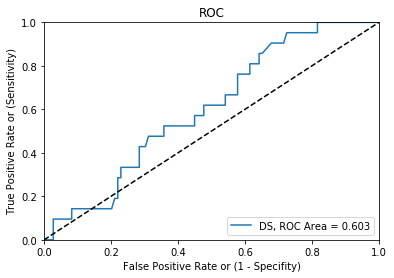

In [20]:
plot_roc_curve(target_test, proba_lr, "DS")

### Was there any difference? 

Answer: No

### What is the primary use of ROC curves?